In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
structure_data=pd.read_excel('Artificial_Data.xlsx')
structure_data.head(2)

,RATING_TYPE,Rating,FundaIndxint,FundaIndxsga,monthvwretd,monthvwretx,monthewretd,monthewretx,monthsprtrn,monthspindx,...,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,string_values
0,Fitch,A+,0.150659,-0.420047,-0.846934,0.560226,0.579303,-0.578314,-0.225006,-0.415867,...,-0.810215,0.308114,-0.596329,-0.235425,-0.456676,1.878286,-1.338060,0.862565,0.822648,"Challenges remain in the supply chain, but str..."
1,Moody's,BB,-0.015715,0.139204,-0.045250,-0.912128,0.497292,-0.910558,1.207592,-0.104050,...,1.201837,-0.469586,0.925473,-0.021617,-0.410984,1.426555,-1.121401,0.853764,0.978653,The company reported a steady increase in reve...


In [3]:
structure_data['Rating'].unique()

array(['A+', 'BB', 'BBB', 'AA', 'AAA', 'A', 'AA+', 'BBB+'], dtype=object)

In [4]:
structure_data['RATING_TYPE'].unique()

array(['Fitch', "Moody's", 'S&P'], dtype=object)

In [5]:
numeric_columns=structure_data.copy()

In [6]:
numeric_columns.drop(columns=['string_values'],inplace=True)
numeric_columns.shape

(100, 153)

In [7]:
numeric_columns.describe()

,FundaIndxint,FundaIndxsga,monthvwretd,monthvwretx,monthewretd,monthewretx,monthsprtrn,monthspindx,monthCAP1RET,monthCAP2RET,...,de_ratio,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.067201,0.075317,0.010728,0.127477,0.093248,0.032180,-0.026623,0.107747,0.166456,-0.016642,...,0.023786,0.071921,0.105777,0.075999,-0.035098,0.044566,0.039607,0.035657,0.201078,-0.002298
std,1.017370,1.029466,1.091580,1.093258,1.111350,1.088224,1.025100,0.881458,1.090800,1.068152,...,0.939972,0.903357,0.836632,0.916895,0.883666,0.937523,1.031948,0.949490,0.995136,0.954758
min,-2.318068,-2.339597,-3.478169,-2.277950,-2.572931,-3.568205,-2.712490,-1.846772,-2.284820,-2.455125,...,-1.840672,-2.141136,-1.918081,-2.441242,-2.041328,-3.104605,-2.445939,-2.180120,-2.290097,-2.240399
25%,-0.733156,-0.587366,-0.681876,-0.528532,-0.636587,-0.624850,-0.511380,-0.542076,-0.489579,-0.669254,...,-0.630071,-0.536992,-0.474784,-0.455624,-0.558593,-0.587734,-0.700866,-0.555797,-0.500505,-0.576669
50%,-0.150513,0.100186,0.020146,0.141856,0.208633,0.037285,0.052313,0.076285,0.084101,0.006114,...,-0.047836,-0.036914,0.060110,0.099997,-0.036728,0.013978,0.011593,0.026002,0.311479,-0.098740
75%,0.537932,0.750813,0.613014,0.704034,0.806156,0.824912,0.733167,0.649335,0.937880,0.779529,...,0.580306,0.800664,0.599499,0.687332,0.575864,0.781912,0.661605,0.590220,0.857408,0.687526
max,3.061095,3.253985,2.539258,2.616700,3.174442,2.760762,1.601238,2.564058,3.094049,2.307792,...,2.378967,2.055849,2.241760,2.641072,2.129482,2.090344,2.702611,2.166460,2.648904,2.113185


## checking correlation

In [9]:
corr_feature=numeric_columns.drop(columns=['RATING_TYPE', 'Rating'])

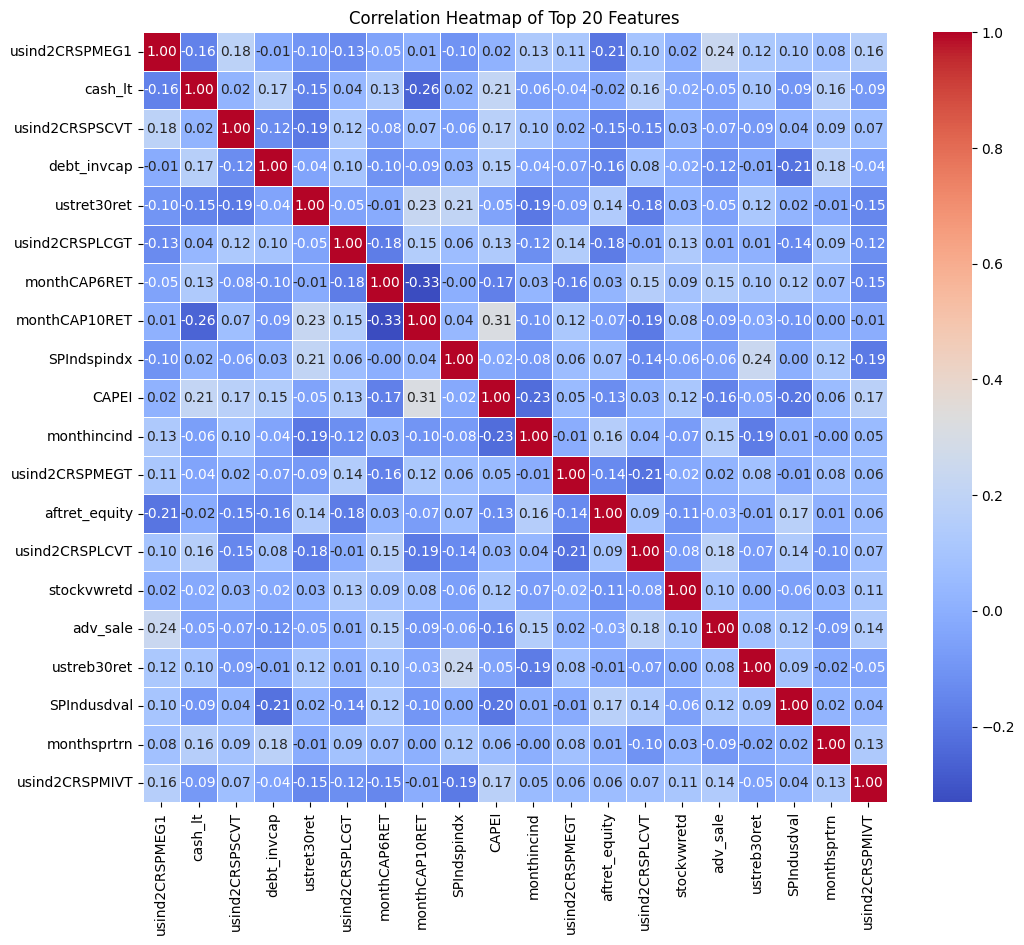

In [10]:
# Compute correlation matrix
corr_matrix = corr_feature.corr()

# Select top 20 correlated features
top_corr_features = corr_matrix.abs().mean().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_columns[top_corr_features].corr(), annot=True, cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap of Top 20 Features")
plt.show()

## Box Plot for Outliers

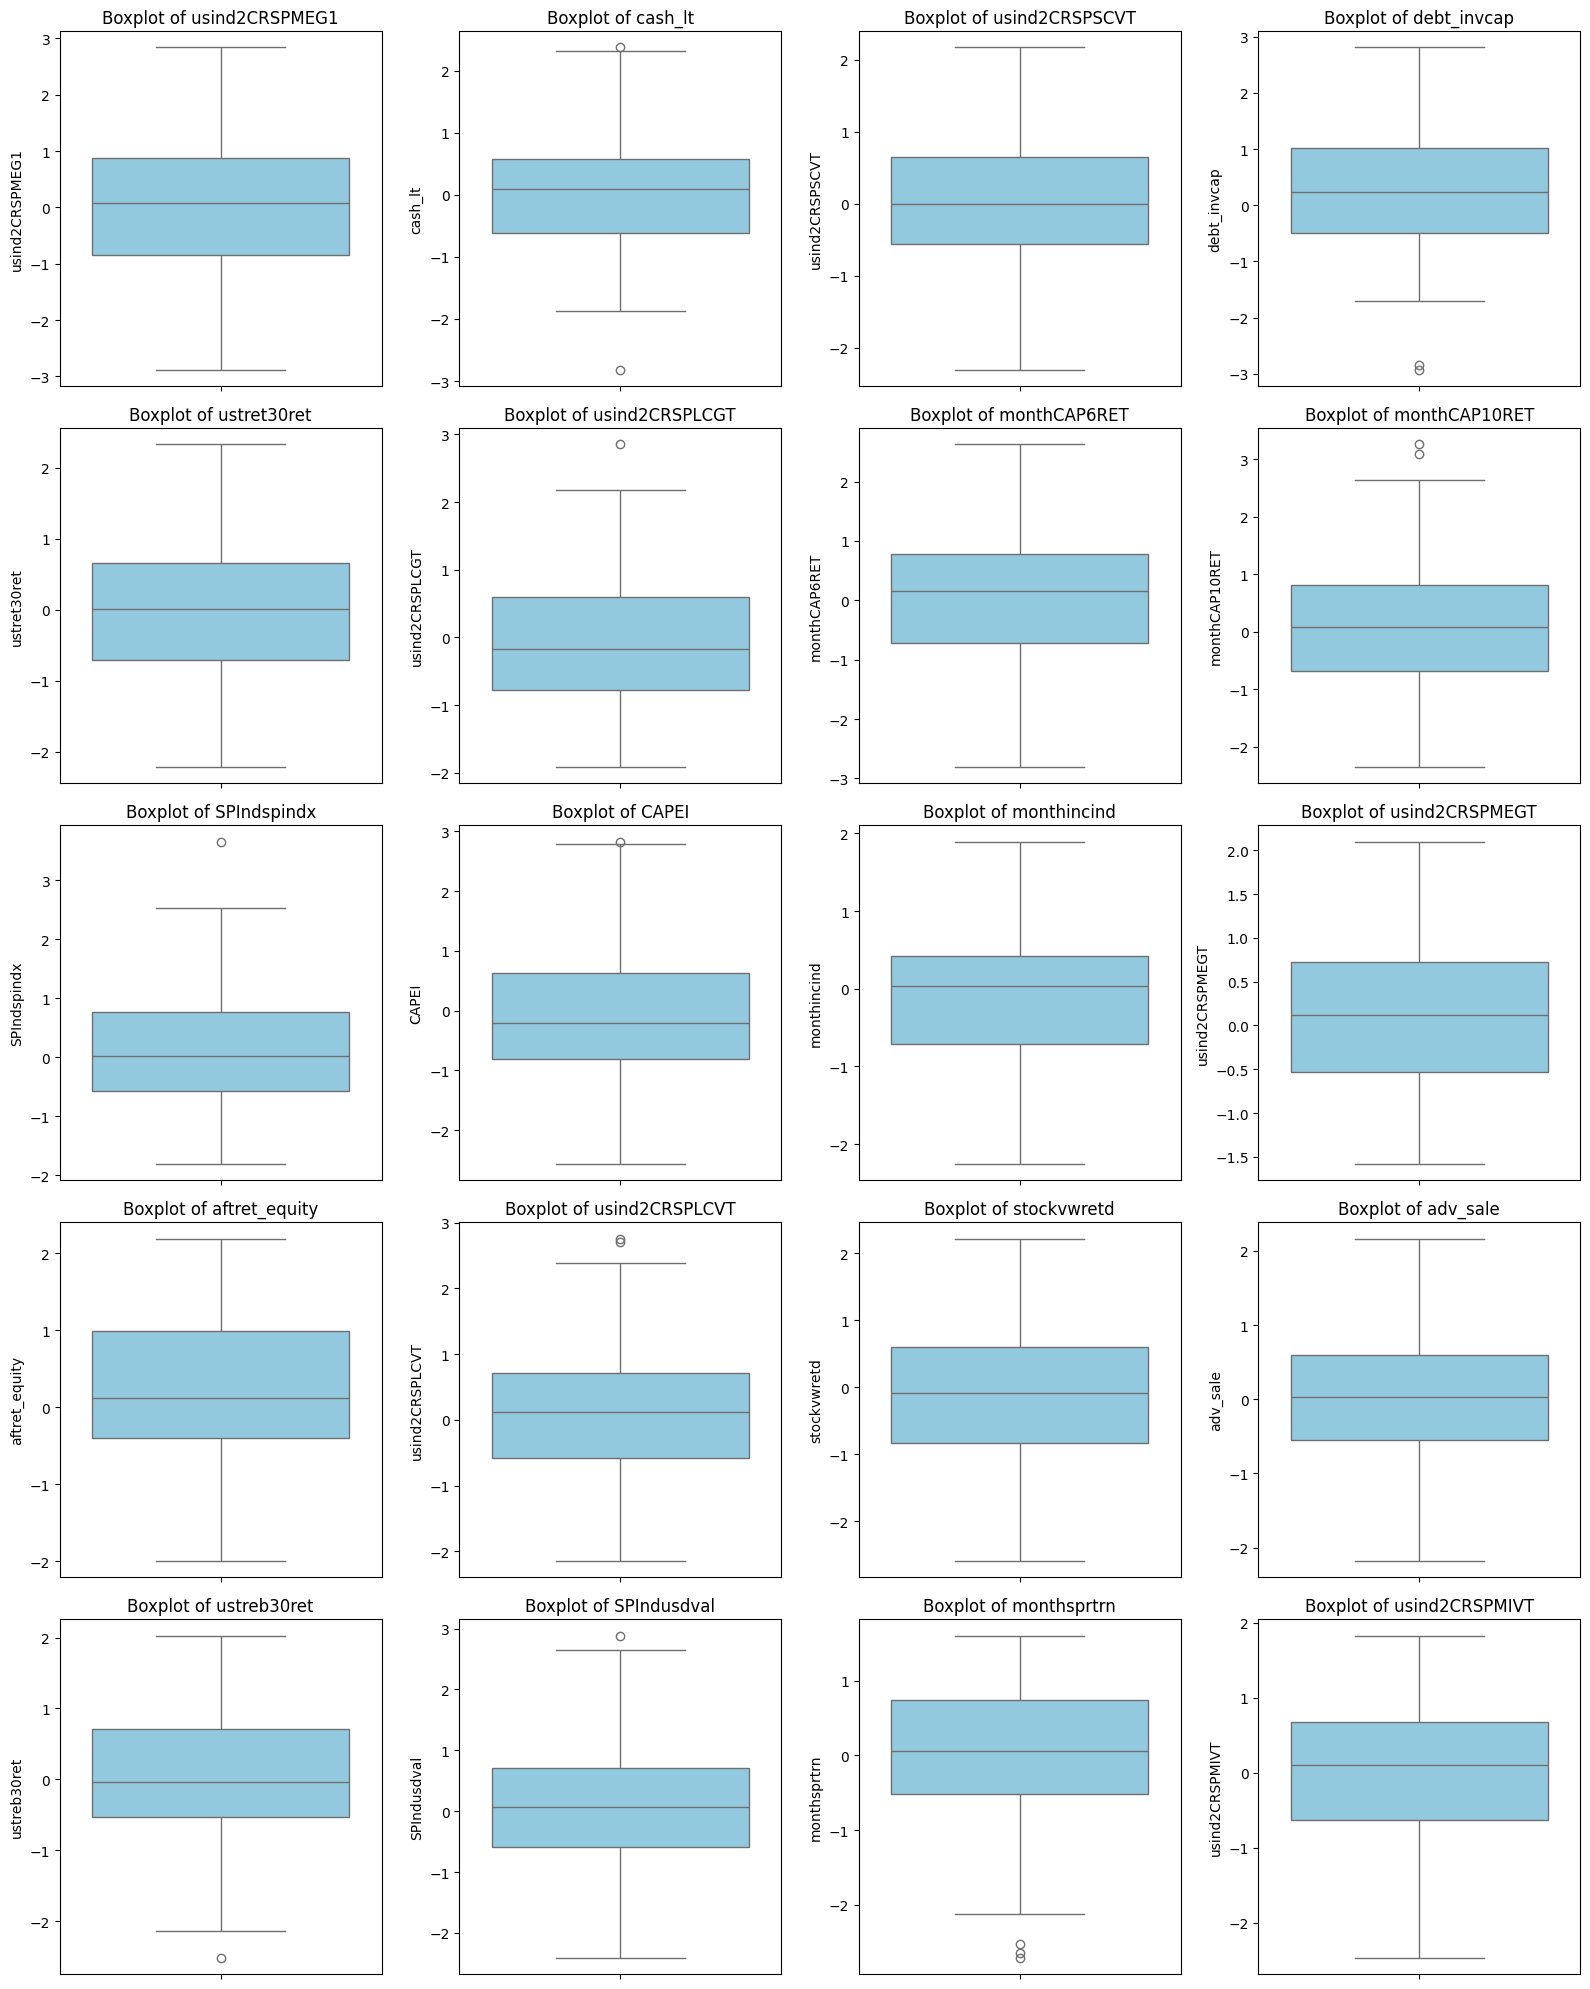

In [11]:
fig, axs = plt.subplots(5, 4, figsize=(16, 20))
axs = axs.flatten()

for i, col in enumerate(top_corr_features):
    sns.boxplot(y=numeric_columns[col], ax=axs[i], color='skyblue')
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Removing Highly Correlated Features

In [72]:
# Create a mask to remove highly correlated features
corr_matrix = corr_feature.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.80:  # Set correlation threshold (e.g., 0.95)
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Drop the correlated features
rhc = numeric_columns.drop(columns=correlated_features)
rhc.shape

(100, 153)

## Remove Outliers

In [73]:
from scipy.stats import zscore

def remove_outliers_zscore(data, threshold=3.0):
    # Calculate Z-Scores for numerical columns
    z_scores = data.select_dtypes(include=['float64', 'int64']).apply(zscore)
    
    # Filter data to remove rows where any z-score exceeds the threshold
    cleaned_data = data[(z_scores.abs() < threshold).all(axis=1)]
    
    return cleaned_data

# Example: Using Z-Score threshold of 3.0
ro = remove_outliers_zscore(rhc, threshold=3.0)
print(f"Original shape: {rhc.shape}")
print(f"Cleaned shape: {ro.shape}")

Original shape: (100, 153)
Cleaned shape: (77, 153)


## Regression Model Building

In [74]:
ro.reset_index(inplace=True,drop=True)
# ro = ro.astype(str)
ro.head(2)

,RATING_TYPE,Rating,FundaIndxint,FundaIndxsga,monthvwretd,monthvwretx,monthewretd,monthewretx,monthsprtrn,monthspindx,...,de_ratio,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual
0,Fitch,A+,0.150659,-0.420047,-0.846934,0.560226,0.579303,-0.578314,-0.225006,-0.415867,...,-0.747744,-0.810215,0.308114,-0.596329,-0.235425,-0.456676,1.878286,-1.338060,0.862565,0.822648
1,Moody's,BB,-0.015715,0.139204,-0.045250,-0.912128,0.497292,-0.910558,1.207592,-0.104050,...,0.610564,1.201837,-0.469586,0.925473,-0.021617,-0.410984,1.426555,-1.121401,0.853764,0.978653


In [75]:
ro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 153 entries, RATING_TYPE to accrual
dtypes: float64(151), object(2)
memory usage: 92.2+ KB


In [76]:
reg=ro.copy()

In [77]:
a=reg[['RATING_TYPE','Rating']]
reg.drop(columns=['RATING_TYPE','Rating'],inplace=True)

In [78]:
import pandas as pd

# Example Data
data = a

# Define Rating Mappings
rating_mapping = {
    'AAA': 1.0, 'AA+': 2.0, 'AA': 3.0, 'AA-': 4.0,
    'A+': 5.0, 'A': 6.0, 'A-': 7.0,
    'BBB+': 8.0, 'BBB': 9.0, 'BBB-': 10.0,
    'BB+': 11.0, 'BB': 12.0, 'BB-': 13.0
}

# Convert to Continuous Values
data['Continuous_Rating'] = data['Rating'].map(rating_mapping)

data


C:\Users\Viky\AppData\Local\Temp\ipykernel_17476\3209883735.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Continuous_Rating'] = data['Rating'].map(rating_mapping)


,RATING_TYPE,Rating,Continuous_Rating
0,Fitch,A+,5.0
1,Moody's,BB,12.0
2,Fitch,BB,12.0
3,Fitch,BBB,9.0
4,Moody's,AA,3.0
...,...,...,...
72,Moody's,BBB+,8.0
73,Moody's,BBB+,8.0
74,Moody's,AA,3.0
75,Moody's,AA+,2.0


In [79]:
data=data[['Continuous_Rating']]

In [80]:
combined=pd.concat([reg,data],axis=1)

In [81]:
combined

,FundaIndxint,FundaIndxsga,monthvwretd,monthvwretx,monthewretd,monthewretx,monthsprtrn,monthspindx,monthCAP1RET,monthCAP2RET,...,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,Continuous_Rating
0,0.150659,-0.420047,-0.846934,0.560226,0.579303,-0.578314,-0.225006,-0.415867,-1.215753,-0.476301,...,-0.810215,0.308114,-0.596329,-0.235425,-0.456676,1.878286,-1.338060,0.862565,0.822648,5.0
1,-0.015715,0.139204,-0.045250,-0.912128,0.497292,-0.910558,1.207592,-0.104050,0.154247,1.388313,...,1.201837,-0.469586,0.925473,-0.021617,-0.410984,1.426555,-1.121401,0.853764,0.978653,12.0
2,-1.330074,0.001814,-2.564342,0.997115,0.762847,-0.870865,0.230487,0.515273,-0.158655,1.659948,...,0.578919,-0.764621,-1.209669,1.463682,-0.825739,-2.171165,-0.533031,-0.615333,-0.302474,12.0
3,-0.025288,0.755935,1.142726,-0.235319,0.637967,-1.611961,0.432309,1.194182,-1.186642,1.275644,...,-0.067498,0.476174,0.845948,-1.749978,0.811008,1.155982,-1.482237,0.000229,0.957513,9.0
4,-0.734548,0.413875,0.599093,0.015064,0.458710,-0.329617,0.132936,-1.499837,0.023308,-2.324679,...,0.540160,-0.652058,-1.434097,0.436933,2.090344,-0.657281,0.664937,0.963913,0.721207,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.339386,0.647558,0.485094,0.451516,0.445399,-0.323265,-0.097100,-0.780302,-0.888211,0.979593,...,2.055849,-0.067622,-0.419065,-0.335484,-0.511173,0.329993,-0.642650,-0.757518,-0.929192,8.0
73,-0.815271,0.536027,-2.062526,0.643803,0.014212,1.143066,0.054319,0.640190,-1.363040,-1.334804,...,-0.221872,0.235991,-0.883573,1.555137,0.041870,-0.193072,-0.536025,0.708392,-0.697977,8.0
74,0.699092,0.840171,2.341975,0.683962,2.276652,-0.418705,1.138171,0.402768,-0.672489,1.109260,...,0.875585,-0.548621,1.674261,0.714463,0.432444,2.080314,1.201069,-1.304036,0.784470,3.0
75,-0.481248,-0.539745,1.611793,0.668101,0.109853,0.371594,0.618141,-1.163221,-0.489539,1.171581,...,-0.458722,1.864500,-0.040158,1.197228,-0.921281,0.188730,-1.913430,0.114276,-0.387544,2.0


## Linear Regression

In [82]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Separate features and target column
X = combined.drop(['Continuous_Rating'], axis=1)
y = combined['Continuous_Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for linear regression, especially if scales are different)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Get the coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_

# Print the model coefficients and intercept
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

# Interpret the coefficients
print("\nInterpretation of Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"Each additional unit increase in {feature} increases the price by {coef:.2f} units of currency.")

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")


Intercept: 6.032786885245901
Coefficients: [ 0.1196548  -0.02125381 -0.18942551  0.29188839 -0.05228363 -0.09795687
  0.01610133  0.39970052  0.2232225   0.0322936  -0.06401527  0.2294668
  0.06056541  0.24974309  0.25023373  0.07748704 -0.07199077  0.20822881
 -0.11217453  0.22218066  0.3054421  -0.26044119 -0.18288132 -0.34420767
  0.05824602  0.02711455  0.11405019 -0.40884333 -0.21345672  0.09652864
  0.14227612  0.60251822 -0.0512886   0.08009354 -0.05180492  0.30470728
  0.02348316  0.09274106  0.74766872  0.3381463  -0.11506003 -0.17116017
 -0.13380503 -0.00761347 -0.31318944  0.00488873  0.09355699  0.04064121
 -0.19327036  0.50821355  0.09554467 -0.00312558  0.12371089 -0.21741823
  0.06742368 -0.34021193 -0.22594016  0.18717052 -0.30734332  0.56588935
  0.31119704  0.02145622 -0.30326129 -0.34895173  0.09261808  0.16222992
 -0.52220698  0.19296014 -0.04743576  0.36984349  0.06816543  0.18232508
  0.07359153 -0.20641322  0.1029524   0.10617985 -0.00862776 -0.17883833
 -0.09981

## Random Forest Regressor

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Separate features and target column
X = combined.drop(['Continuous_Rating'], axis=1)
y = combined['Continuous_Rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 8.6069125
R^2 Score: 0.08154664443518134
Root Mean Squared Error: 2.9337539944582947


##### Model is not performing well may be we have small dataset and with respect to rows we have lot of features now we can try to reduce features

## Feature Selection

### drop low variance features

In [52]:
lv=X.copy()

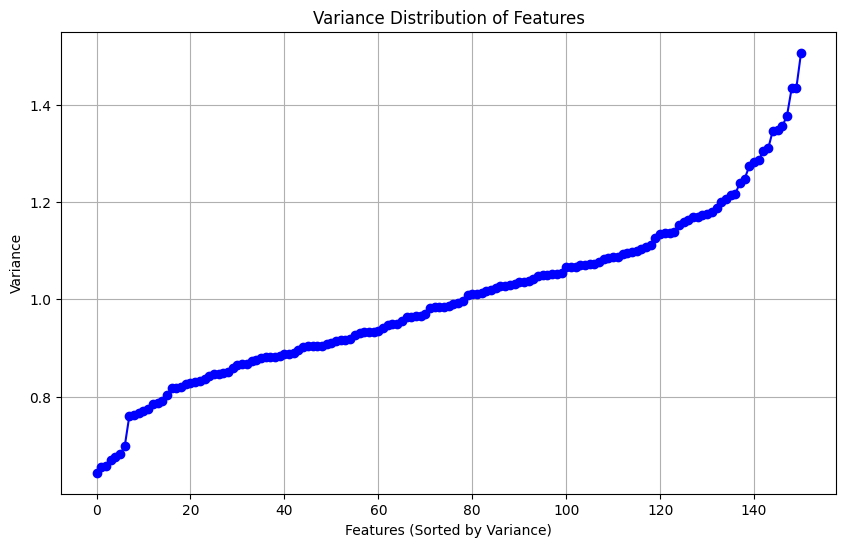

In [53]:
# Calculate variances for numerical columns
numeric_data = lv.select_dtypes(include=['float64', 'int64'])
variances = lv.var()

# Plot the variance distribution
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(variances)), sorted(variances), marker='o', color='blue')
plt.xlabel('Features (Sorted by Variance)')
plt.ylabel('Variance')
plt.title('Variance Distribution of Features')
plt.grid()
plt.show()


###### In Above plot we can see that variances range from approximately 0.65 to 1.55

###### so we can take the threshold 0.7 to reduce the feature size

In [54]:
from sklearn.feature_selection import VarianceThreshold
# Set threshold as the 10th percentile of the variance
threshold = variances.quantile(0.7)
selector = VarianceThreshold(threshold=threshold)
df_selected = selector.fit_transform(X)

# Get the selected features
selected_columns = X.columns[selector.get_support()]
print("Selected Features:", selected_columns)


Selected Features: Index(['monthvwretx', 'monthewretd', 'monthewretx', 'monthsprtrn',
       'monthCAP1RET', 'monthCAP3RET', 'monthCAP4RET', 'monthCAP6RET',
       'monthCAP9RET', 'monthCAP10RET', 'monthprtcnt', 'monthtotret',
       'monthtotind', 'SPIndewretx', 'SPIndusdcnt', 'SPporusdcnt',
       'usind2CRSPMEG1', 'usind2CRSPMIG1', 'stockvwretd', 'stockvwretx',
       'stockvwUsdVal', 'stockvwTotCnt', 'stockewUsdVal', 'stockewUsdCnt',
       'stocksprtrn', 'ustreb10ind', 'ustreb5ret', 'ustreb2ret', 'ustreb2ind',
       'ustreb1ret', 'ustret90ind', 'index_y', 'CAPEI', 'evm', 'pe_op_dil',
       'opmbd', 'gpm', 'cfm', 'aftret_eq', 'equity_invcap', 'lt_debt'],
      dtype='object')


### Here i am using  Random_Forest for feature importance

In [86]:
fi=combined.copy()
fi.head(2)

,FundaIndxint,FundaIndxsga,monthvwretd,monthvwretx,monthewretd,monthewretx,monthsprtrn,monthspindx,monthCAP1RET,monthCAP2RET,...,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,Continuous_Rating
0,0.150659,-0.420047,-0.846934,0.560226,0.579303,-0.578314,-0.225006,-0.415867,-1.215753,-0.476301,...,-0.810215,0.308114,-0.596329,-0.235425,-0.456676,1.878286,-1.338060,0.862565,0.822648,5.0
1,-0.015715,0.139204,-0.045250,-0.912128,0.497292,-0.910558,1.207592,-0.104050,0.154247,1.388313,...,1.201837,-0.469586,0.925473,-0.021617,-0.410984,1.426555,-1.121401,0.853764,0.978653,12.0


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming your target variable is 'target', split data into X and y
X = fi.drop(columns=['Continuous_Rating'])
y = fi['Continuous_Rating']



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")



Feature Importances:
FundaIndxint: 0.0027
FundaIndxsga: 0.0005
monthvwretd: 0.0141
monthvwretx: 0.0471
monthewretd: 0.0104
monthewretx: 0.0039
monthsprtrn: 0.0032
monthspindx: 0.0027
monthCAP1RET: 0.0034
monthCAP2RET: 0.0022
monthCAP3RET: 0.0005
monthCAP4RET: 0.0094
monthCAP5RET: 0.0048
monthCAP6RET: 0.0026
monthCAP7RET: 0.0079
monthCAP8RET: 0.0021
monthCAP9RET: 0.0018
monthCAP10RET: 0.0061
monthtotval: 0.0078
monthtotcnt: 0.0068
monthusdval: 0.0097
monthusdcnt: 0.0056
monthprtcnt: 0.0042
monthtotret: 0.0131
monthtotind: 0.0041
monthcapret: 0.0087
monthcapind: 0.0009
monthincret: 0.0069
monthincind: 0.0162
SPIndvwretd: 0.0020
SPIndvwretx: 0.0053
SPIndewretd: 0.0006
SPIndewretx: 0.0017
SPIndtotval: 0.0021
SPIndtotcnt: 0.0005
SPIndusdval: 0.0124
SPIndusdcnt: 0.0032
SPIndspindx: 0.0063
SPIndsprtrn: 0.0214
SPporvwretd: 0.0022
SPporvwretx: 0.0022
SPporewretd: 0.0104
SPporewretx: 0.0013
SPportotval: 0.0079
SPportotcnt: 0.0073
SPporusdval: 0.0048
SPporusdcnt: 0.0024
SPporspindx: 0.0035
SPpors

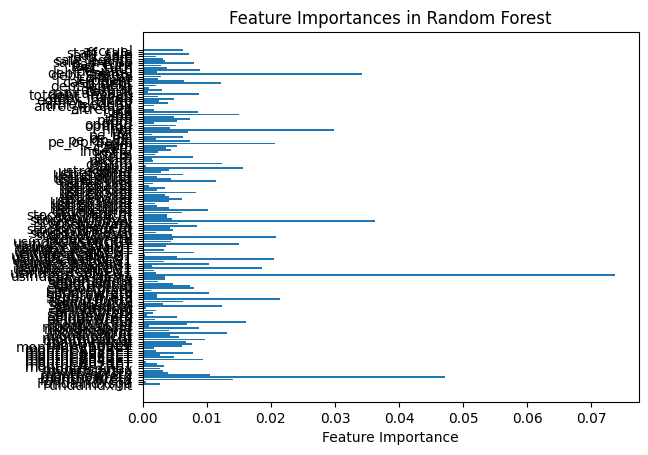

In [93]:
# Plot feature importances
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest')
plt.show()

In [94]:
import numpy as np

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

# Select features covering 80% cumulative importance
selected_features = feature_importance[feature_importance['cumulative_importance'] <= 0.80]['feature']

# Reduce the dataset using selected features
data_reduced = X[selected_features]

In [95]:
data_reduced

,SPIndsprtrn,usind2CRSPMEV1,usind2CRSPSCG1,stockvwretx,pcf,ustreb1ind,stockewretd,monthusdval,usind2CRSPMEVT,monthincind,...,de_ratio,SPIndusdval,monthincret,SPporusdval,cfm,bm,SPporvwretd,usind2CRSPLCV1,stockvwTotVal,monthCAP1RET
0,-0.694966,-1.113458,1.493474,-0.462191,0.923675,1.305522,-0.706920,0.107695,0.120604,1.152031,...,-0.747744,1.851882,1.130983,0.397852,1.288532,0.713078,-0.975380,-1.038158,-0.536018,-1.215753
1,-0.027828,1.522147,2.118975,-1.598496,-1.170778,0.241228,1.271909,0.411786,-0.093658,1.822169,...,0.610564,-0.281068,0.750278,1.016630,-0.728797,-1.830337,0.936036,0.645630,1.559406,0.154247
2,0.547142,1.030588,0.029436,-1.595325,0.076919,-0.658951,0.828639,-1.307574,1.959210,-1.602676,...,-0.081413,-0.780955,0.131419,-0.203823,-0.741207,2.147247,0.875876,0.571158,-0.535037,-0.158655
3,-0.858355,1.003039,-1.158214,-0.201068,-0.520364,-1.165852,-0.746273,0.191661,-0.457764,-1.215598,...,0.856828,-0.423775,-0.407477,0.647098,2.220871,0.248025,-0.466627,0.563452,0.327655,-1.186642
4,0.301024,-1.234889,1.033016,0.955629,-0.063331,1.464513,-0.725516,-1.556763,-0.006202,-0.256551,...,1.152037,0.897758,-1.127097,-0.607740,-0.949150,0.157475,-0.285878,-0.638092,0.763426,0.023308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.414616,0.439826,1.595283,0.598538,0.158097,0.284065,2.049268,-0.652958,1.473812,-1.149629,...,-0.323142,0.612629,-1.030194,1.336265,0.842525,0.375286,0.442720,1.462486,1.380198,-0.888211
73,0.944006,-1.750408,-0.310074,-0.654164,0.277788,-0.475925,-0.877489,1.213381,0.872064,-0.983933,...,0.841021,0.794438,-0.038141,0.379892,1.883262,-0.863288,0.996351,0.179582,0.876473,-1.363040
74,-0.462353,0.234343,0.469455,-0.442037,1.090845,-1.928877,-0.038404,0.063179,-0.722685,-0.271820,...,-0.015054,1.225259,0.319401,1.083213,-2.228680,-0.446509,-1.152062,0.252156,-0.266323,-0.672489
75,-1.371367,-1.485576,0.349777,-0.516734,0.023185,0.280202,1.934625,-0.604492,2.305164,-1.166238,...,0.563179,1.268621,0.415065,-0.443321,-2.384946,-0.648586,1.829960,0.156654,0.118402,-0.489539


### model building after feature selection

In [96]:
a=fi[['Continuous_Rating']]

In [97]:
fs = pd.concat([data_reduced,a], axis=1)

In [98]:
fs.shape

(77, 75)

In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Separate features and target column
X = fs.drop(['Continuous_Rating'], axis=1)
y = fs['Continuous_Rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 8.90593125
R^2 Score: 0.049638015839933325
Root Mean Squared Error: 2.9842806922271907


## HyperParameter Tuining

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                    n_iter=50, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the data
random_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 298}
Best Score: nan


In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Separate features and target column
X = fs.drop(['Continuous_Rating'], axis=1)
y = fs['Continuous_Rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=298,max_depth=30,min_samples_split=3,min_samples_leaf=4, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 8.105630377728463
R^2 Score: 0.13503902596978468
Root Mean Squared Error: 2.847038878857903
